## Проект 2. Разведывательный анализ данных (EDA)	

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

### Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

Рекомендации по выполнению проекта
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [3]:
stud = pd.read_csv('stud_math.csv')

### Общие сведениея о датасете

In [4]:
print('Набор данных имеет {} колонок и {} строк'.format(stud.shape[1], stud.shape[0]))

Набор данных имеет 30 колонок и 395 строк


In [5]:
print('{} колонок содержат пропущенные значения'.format(stud.isnull().any().sum()))

27 колонок содержат пропущенные значения


In [6]:
print('Всего {}% строк без пропущенных значений'.format(round(stud.dropna().shape[0] / stud.shape[0]*100),1))

Всего 25% строк без пропущенных значений


In [7]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [8]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Датасет содержит 13 числовых и 17 строковых колонок

In [9]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Приведём наименования столбцов к одному виду:

In [10]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [11]:
stud.head(3)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


## Исследование данных
Рассмотрим все столбцы

### school
1 school — аббревиатура школы, в которой учится ученик

In [12]:
def view_values(column):
    """ Возвращает датафрейм содержащий значения в процентном соотношении """
    return pd.DataFrame(stud[column].value_counts(dropna=False, normalize=True))

In [13]:
def view_info(column):
    """ Возвращает детальную информацию о столбце """
    return stud.loc[:, [column]].info()

In [14]:
# Какие значения присутствуют в данном столбце
view_values('school')

,school
GP,0.883544
MS,0.116456


In [15]:
stud.school.describe()

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

In [16]:
# Детальная информация
view_info('school')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Довольно мало, 2 уникальных значения. Преимущество на стороне GP.

### sex
2 sex — пол ученика ('F' - женский, 'M' - мужской)

In [17]:
# Какие значения присутствуют в данном столбце
view_values('sex')

,sex
F,0.526582
M,0.473418


In [18]:
stud.sex.describe()

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

Девушек чуть больше, но в целом - почти поровну.

### age
3 age — возраст ученика (от 15 до 22)

In [19]:
# Какие значения присутствуют в данном столбце
view_values('age')

,age
16,0.263291
17,0.248101
18,0.207595
15,0.207595
19,0.060759
20,0.007595
22,0.002532
21,0.002532


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

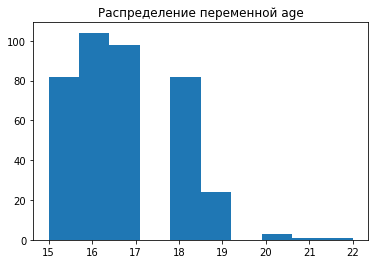

In [20]:
# Посмотрим на распределение
plt.hist(stud.age);
plt.title('Распределение переменной age');
stud.age.describe()

Данные не содержат выбросов и пропусков, а так же соответствуют условию (возраст от 15 до 22 лет). Больше всего учеников 16-17 лет.

### address
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [21]:
# Какие значения присутствуют в данном столбце
view_values('address')

,address
U,0.746835
R,0.210127
NaN,0.043038


In [22]:
# Детальная информация
view_info('address')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Более 70% учеников живут в городе. В данных содержится 4% пустых значений.

Пустые значения заполнить нечем, оставим в None

In [23]:
# Напишем функцию для приведения невалидных и пустых значений к одному виду
def change_empty(column):
    """ Замена пустых значений для строковых данных """
    return stud[column].apply(lambda x: None if type(x) == float else None if x == None else None if x.strip() == '' else x)

# None if x == None, чтобы x.strip() не спотыкался об None

In [24]:
# Подчищаем невалидные данные
stud.address = change_empty('address')

### famsize
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [25]:
# Какие значения присутствуют в данном столбце
view_values('famsize')

,famsize
GT3,0.660759
LE3,0.270886
NaN,0.068354


In [26]:
# Детальная информация
view_info('famsize')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [27]:
# Подчищаем невалидные данные
stud.famsize = change_empty('famsize')

66% семей с тремя и более членами. 

Примерно 7% пропущенных значений в колонке.

### pstatus
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [28]:
# Какие значения присутствуют в данном столбце
view_values('pstatus')

,pstatus
T,0.794937
NaN,0.113924
A,0.091139


In [29]:
stud.pstatus.describe()

count     350
unique      2
top         T
freq      314
Name: pstatus, dtype: object

In [30]:
# Детальная информация
view_info('pstatus')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [31]:
# Подчищаем невалидные данные
stud.pstatus = change_empty('pstatus')

Около 80% родителей живут вместе.

Довольно много пропущенных значений, 11%

### medu
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [32]:
# Какие значения присутствуют в данном столбце
view_values('medu')

,medu
4.0,0.331646
2.0,0.258228
3.0,0.245570
1.0,0.149367
0.0,0.007595
NaN,0.007595


In [33]:
# Детальная информация
view_info('medu')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    356.000000
mean       2.761236
std        1.101478
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

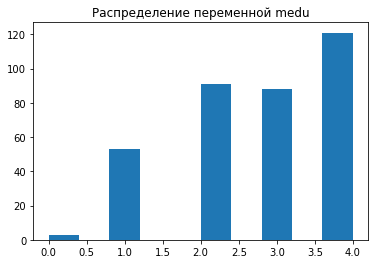

In [132]:
# Посмотрим на распределение
plt.hist(stud.medu);
plt.title('Распределение переменной medu');
stud.medu.describe()

Большая часть матерей имеют высшее образование.

Выбросов нет, данные согласно условию. Пропущенные значения есть, но не так много.

### fedu
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [35]:
# Какие значения присутствуют в данном столбце
view_values('fedu')

,fedu
2.0,0.268354
3.0,0.243038
4.0,0.222785
1.0,0.197468
NaN,0.060759
0.0,0.005063
40.0,0.002532


In [36]:
# Детальная информация
view_info('fedu')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Есть пропущенные значения - 6%

Присутствует значение более 4 (выбросы, так как по условию, такого быть не может).

Отфильтруем.

In [37]:
# Оставляем значения только в диапазоне 0-4
# Этот метод очистит так же и пропущенные
# stud = stud.loc[stud.fedu.between(0, 4)]

# Удалить данные, где fedu > 4
stud = stud.drop(stud[stud.fedu > 4].index)

In [38]:
# Проверяем. Отсеялись также строки с None
view_values('fedu')

,fedu
2.0,0.269036
3.0,0.243655
4.0,0.223350
1.0,0.197970
NaN,0.060914
0.0,0.005076


count    336.000000
mean       2.494048
std        1.092700
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

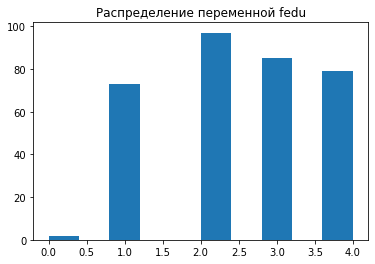

In [125]:
# Посмотрим на распределение
plt.hist(stud.fedu);
plt.title('Распределение переменной fedu');
stud.fedu.describe()

Большая часть отцов в этом исследовании имеют образование 5-9 классов

### mjob
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [40]:
# Какие значения присутствуют в данном столбце
view_values('mjob')

,mjob
other,0.337563
services,0.246193
at_home,0.147208
teacher,0.139594
health,0.081218
NaN,0.048223


In [41]:
stud.mjob.describe()

count       375
unique        5
top       other
freq        133
Name: mjob, dtype: object

In [42]:
# Детальная информация
view_info('mjob')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    375 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [43]:
# Подчищаем невалидные данные
stud.mjob = change_empty('mjob')

Лидирует значение 'другое' - 33%

5% пропущенных значений. 

### fjob
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [44]:
# Какие значения присутствуют в данном столбце
view_values('fjob')

,fjob
other,0.497462
services,0.258883
NaN,0.091371
teacher,0.073604
at_home,0.040609
health,0.038071


In [45]:
stud.fjob.describe()

count       358
unique        5
top       other
freq        196
Name: fjob, dtype: object

In [46]:
# Детальная информация
view_info('fjob')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    358 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [47]:
# Подчищаем невалидные данные
stud.fjob = change_empty('fjob')

9% пропущенных значений. 

Так же, как и у матерей, большинтсво отцов заняты в секторе 'other'- другое.

### reason
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [48]:
# Какие значения присутствуют в данном столбце
view_values('reason')

,reason
course,0.347716
home,0.263959
reputation,0.258883
other,0.086294
NaN,0.043147


In [49]:
# Детальная информация
view_info('reason')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [50]:
# Подчищаем невалидные данные
stud.reason = change_empty('reason')

Образовательная программа - наиболее пополуярный выбор. 4% пустых значений.

### guardian
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [51]:
# Какие значения присутствуют в данном столбце
view_values('guardian')

,guardian
mother,0.634518
father,0.215736
NaN,0.078680
other,0.071066


In [52]:
# Детальная информация
view_info('guardian')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  363 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [53]:
# Подчищаем невалидные данные
stud.guardian = change_empty('guardian')

Опекуном, в ~ 68% заявлена - мать, 21% - отец, 7% - другие. 

8% пропущенных значений.

### traveltime
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [54]:
# Какие значения присутствуют в данном столбце
view_values('traveltime')

,traveltime
1.0,0.614213
2.0,0.243655
NaN,0.071066
3.0,0.053299
4.0,0.017766


In [55]:
# Детальная информация
view_info('traveltime')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  366 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


count    331.000000
mean       1.438066
std        0.703843
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

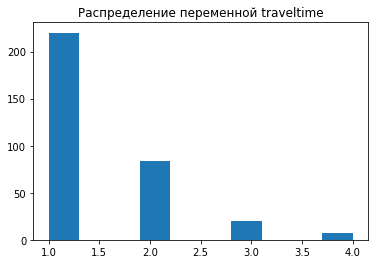

In [133]:
# Посмотрим на распределение
plt.hist(stud.traveltime);
plt.title('Распределение переменной traveltime');
stud.traveltime.describe()

Большая часть учеников (60% тратят на дорогу менее 15 минут).

6% пропусков значений. Выбросов нет.

### studytime
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [57]:
# Какие значения присутствуют в данном столбце
view_values('studytime')

,studytime
2.0,0.492386
1.0,0.261421
3.0,0.159898
4.0,0.068528
NaN,0.017766


In [58]:
# Детальная информация
view_info('studytime')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  387 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


count    354.000000
mean       2.048023
std        0.858524
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

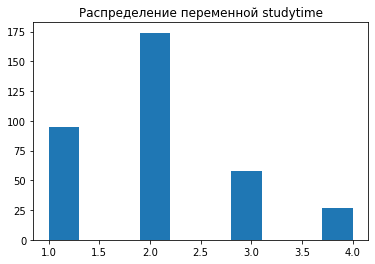

In [127]:
# Посмотрим на распределение
plt.hist(stud.studytime);
plt.title('Распределение переменной studytime');
stud.studytime.describe()

Около 2% пустых значений. Выбросов нет.

Почти половина детей тратит от 2 до 5 часов на учёбу помимо школы.

### failures
failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [60]:
# Какие значения присутствуют в данном столбце
view_values('failures')

,failures
0.0,0.741117
1.0,0.124365
NaN,0.055838
2.0,0.040609
3.0,0.038071


In [61]:
# 5% пустых значений, по условию, заменяем на 0
stud.failures = stud.failures.apply(lambda x: x if (x >= 1) or (x <= 3) else 0)

In [62]:
# Проверяем после исправления
view_values('failures')

,failures
0.0,0.796954
1.0,0.124365
2.0,0.040609
3.0,0.038071


In [63]:
# Детальная информация
view_info('failures')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


count    394.000000
mean       0.319797
std        0.726989
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

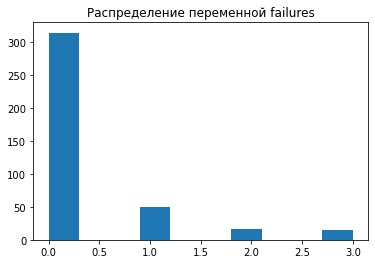

In [64]:
# Посмотрим на распределение
plt.hist(stud.failures);
plt.title('Распределение переменной failures');
stud.failures.describe()

80% учеников, у которых внеучебных неудач = 0

### schoolsup
16 schoolsup — дополнительная образовательная поддержка (yes или no)

In [65]:
# Какие значения присутствуют в данном столбце
view_values('schoolsup')

,schoolsup
no,0.847716
yes,0.129442
NaN,0.022843


In [66]:
# Детальная информация
view_info('schoolsup')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  385 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [67]:
# Подчищаем невалидные данные
stud.schoolsup = change_empty('schoolsup')

2% пустых значений.

Около 85% учеников не имеют дополнительной образовательной поддержки

### famsup
17 famsup — семейная образовательная поддержка (yes или no)

In [68]:
# Какие значения присутствуют в данном столбце
view_values('famsup')

,famsup
yes,0.553299
no,0.347716
NaN,0.098985


In [69]:
# Детальная информация
view_info('famsup')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  355 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [70]:
# Подчищаем невалидные данные
stud.famsup = change_empty('famsup')

Почти 9.5% пустых значений.

55% имеют семейную образовательную поддержку

### paid
18 paid — дополнительные платные занятия по математике (yes или no)

In [71]:
# Какие значения присутствуют в данном столбце
view_values('paid')

,paid
no,0.505076
yes,0.393401
NaN,0.101523


In [72]:
# Детальная информация
view_info('paid')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    354 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [73]:
# Подчищаем невалидные данные
stud.paid = change_empty('paid')

Половина учеников обходится без платных занятий по математике. 39% - оплачивают дополнительные курсы. Ещё 10% - нет данных.

### activities
19 activities — дополнительные внеучебные занятия (yes или no)

In [74]:
# Какие значения присутствуют в данном столбце
view_values('activities')

,activities
yes,0.492386
no,0.472081
NaN,0.035533


In [75]:
# Детальная информация
view_info('activities')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  380 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [76]:
# Подчищаем невалидные данные
stud.activities = change_empty('activities')

3% Пустых значений. Остальные, примерно поровну.

### nursery
20 nursery — посещал детский сад (yes или no)

In [77]:
# Какие значения присутствуют в данном столбце
view_values('nursery')

,nursery
yes,0.758883
no,0.200508
NaN,0.040609


In [78]:
# Детальная информация
view_info('nursery')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  378 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [79]:
# Подчищаем невалидные данные
stud.nursery = change_empty('nursery')

4% пустых значений. В основом, ученики посещали детский сад.

### studytime_granular
Нет описания

In [80]:
# Вероятно, лишнее для анализа, а так же сильно коррелирует с колонкой studytime. Удаляем.
stud.drop(['studytime_granular'], inplace = True, axis = 1)

### higher
21 higher — хочет получить высшее образование (yes или no)

In [81]:
# Какие значения присутствуют в данном столбце
view_values('higher')

,higher
yes,0.901015
NaN,0.050761
no,0.048223


In [82]:
# Детальная информация
view_info('higher')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  374 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [83]:
# Подчищаем невалидные данные
stud.higher = change_empty('higher')

90% учеников хотят иметь высшее образование.

Около 5% данных отсутствует.

### internet
22 internet — наличие интернета дома (yes или no)

In [84]:
# Какие значения присутствуют в данном столбце
view_values('internet')

,internet
yes,0.771574
no,0.142132
NaN,0.086294


In [85]:
# Детальная информация
view_info('internet')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  360 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [86]:
# Подчищаем невалидные данные
stud.internet = change_empty('internet')

76% учеников обеспечены интернетом. 

Около 9% - нет данных.

### romantic
23 romantic — в романтических отношениях (yes или no)

In [87]:
# Какие значения присутствуют в данном столбце
view_values('romantic')

,romantic
no,0.606599
yes,0.314721
NaN,0.078680


In [88]:
# Детальная информация
view_info('romantic')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  363 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [89]:
# Подчищаем невалидные данные
stud.romantic = change_empty('romantic')

31% состоят в романтических отношениях. 

7% - нет данных.

### famrel
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [90]:
# Какие значения присутствуют в данном столбце
view_values('famrel')

,famrel
4.0,0.461929
5.0,0.248731
3.0,0.157360
NaN,0.068528
2.0,0.043147
1.0,0.017766
-1.0,0.002538


In [91]:
# Детальная информация
view_info('famrel')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  367 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


В данной выборке есть неликвидные данные (отрицательное значение).

In [92]:
# Отсеим неликвидные данные
# stud = stud.loc[stud.famrel.between(1, 5)]

# Удалить строки, где famrel < 1
stud = stud.drop(stud[stud.famrel < 1].index)

In [93]:
# Проверяем
view_values('famrel')

,famrel
4.0,0.463104
5.0,0.249364
3.0,0.157761
NaN,0.068702
2.0,0.043257
1.0,0.017812


Большинство учеников в хороших (4,5) семейных отношениях.

6% отсутствующих данных.

### freetime
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [94]:
# Какие значения присутствуют в данном столбце
view_values('freetime')

,freetime
3.0,0.389313
4.0,0.284987
2.0,0.155216
5.0,0.096692
1.0,0.045802
NaN,0.027990


In [95]:
# Детальная информация
view_info('freetime')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    352.000000
mean       3.252841
std        0.979123
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

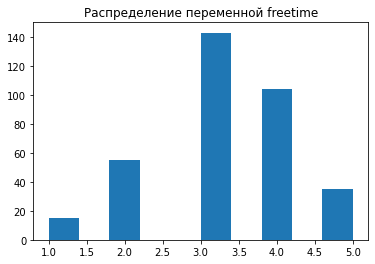

In [128]:
# Посмотрим на распределение
plt.hist(stud.freetime);
plt.title('Распределение переменной freetime');
stud.freetime.describe()

Нормальное распределение. 

2% - нет данных.

### goout
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [97]:
# Какие значения присутствуют в данном столбце
view_values('goout')

,goout
3.0,0.323155
2.0,0.251908
4.0,0.213740
5.0,0.132316
1.0,0.058524
NaN,0.020356


In [98]:
# Детальная информация
view_info('goout')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   385 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    352.000000
mean       3.088068
std        1.109747
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

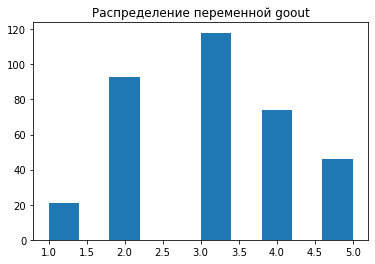

In [129]:
# Посмотрим на распределение
plt.hist(stud.goout);
plt.title('Распределение переменной goout');
stud.goout.describe()

Как и в предыдущем столбце, 2% - нет данных.

### health
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [100]:
# Какие значения присутствуют в данном столбце
view_values('health')

,health
5.0,0.348601
3.0,0.226463
4.0,0.157761
1.0,0.119593
2.0,0.109415
NaN,0.038168


In [101]:
# Детальная информация
view_info('health')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  378 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    344.000000
mean       3.549419
std        1.392567
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

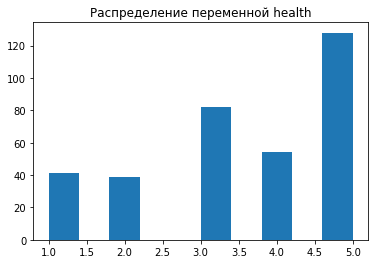

In [130]:
# Посмотрим на распределение
plt.hist(stud.health);
plt.title('Распределение переменной health');
stud.health.describe()

3,5% - нет данных

### absences
28 absences — количество пропущенных занятий

In [103]:
# Какие значения присутствуют в данном столбце
view_values('absences')

,absences
0.0,0.282443
2.0,0.152672
4.0,0.132316
6.0,0.078880
8.0,0.053435
10.0,0.043257
12.0,0.030534
NaN,0.030534
14.0,0.027990
3.0,0.020356


In [104]:
# Детальная информация
view_info('absences')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  381 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    359.000000
mean       4.584958
std        4.978490
min        0.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

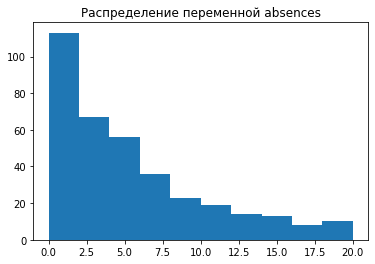

In [131]:
# Посмотрим на распределение
plt.hist(stud.absences);
plt.title('Распределение переменной absences');
stud.absences.describe()

В данном случае наблюдаются выбросы. Видно, что основные значения лежат в диапазоне 0-20. 

3% - нет данных.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


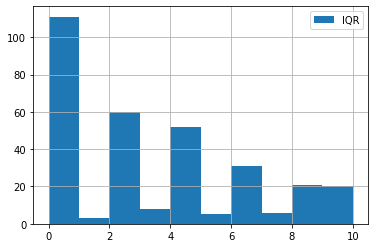

In [106]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

<AxesSubplot:xlabel='absences'>

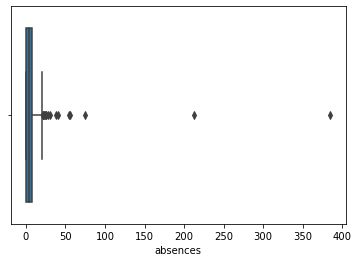

In [107]:
sns.boxplot(stud.absences)

In [108]:
# Отсеять выбросы
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

<AxesSubplot:xlabel='absences'>

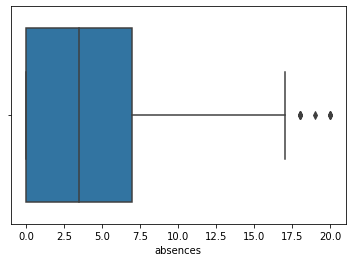

In [109]:
# Посмотрим, что получилось
sns.boxplot(stud.absences)

count    364.000000
mean       4.579670
std        4.954529
min        0.000000
25%        0.000000
50%        3.500000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

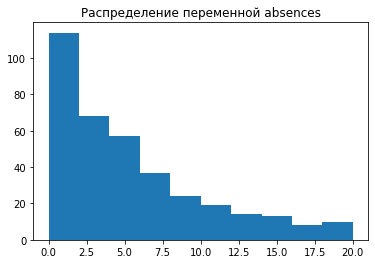

In [110]:
# Посмотрим теперь на распределение
plt.hist(stud.absences);
plt.title('Распределение переменной absences');
stud.absences.describe()

Отсяев лютых прогульщиков наблюдаем более-менее внятную картину по пропущенным занятиям.

### score
29 score — баллы по госэкзамену по математике

In [111]:
# Какие значения присутствуют в данном столбце
view_values('score')

,score
50.0,0.145604
55.0,0.115385
0.0,0.098901
75.0,0.085165
65.0,0.082418
60.0,0.076923
70.0,0.074176
40.0,0.068681
45.0,0.063187
80.0,0.043956


In [112]:
# Детальная информация
view_info('score')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   359 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [113]:
# Нет смысла анализировать учеников без баллов
stud = stud.loc[stud.score.between(0, 100)]

count    359.000000
mean      52.005571
std       23.007528
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

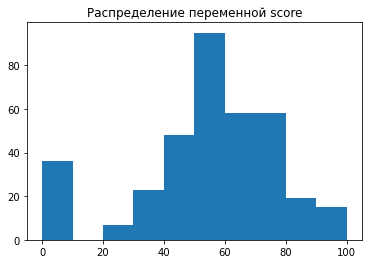

In [114]:
# Посмотрим на распределение
plt.hist(stud.score);
plt.title('Распределение переменной score');
stud.score.describe()

Какова вероятность того, что около 10% учеников набрали 0 баллов? Пока оставим.

In [115]:
# Проверим на выбросы
median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


Границы выбросов: [-5.0, 115.0]. Отсеивать нечего.

## Корреляционный анализ

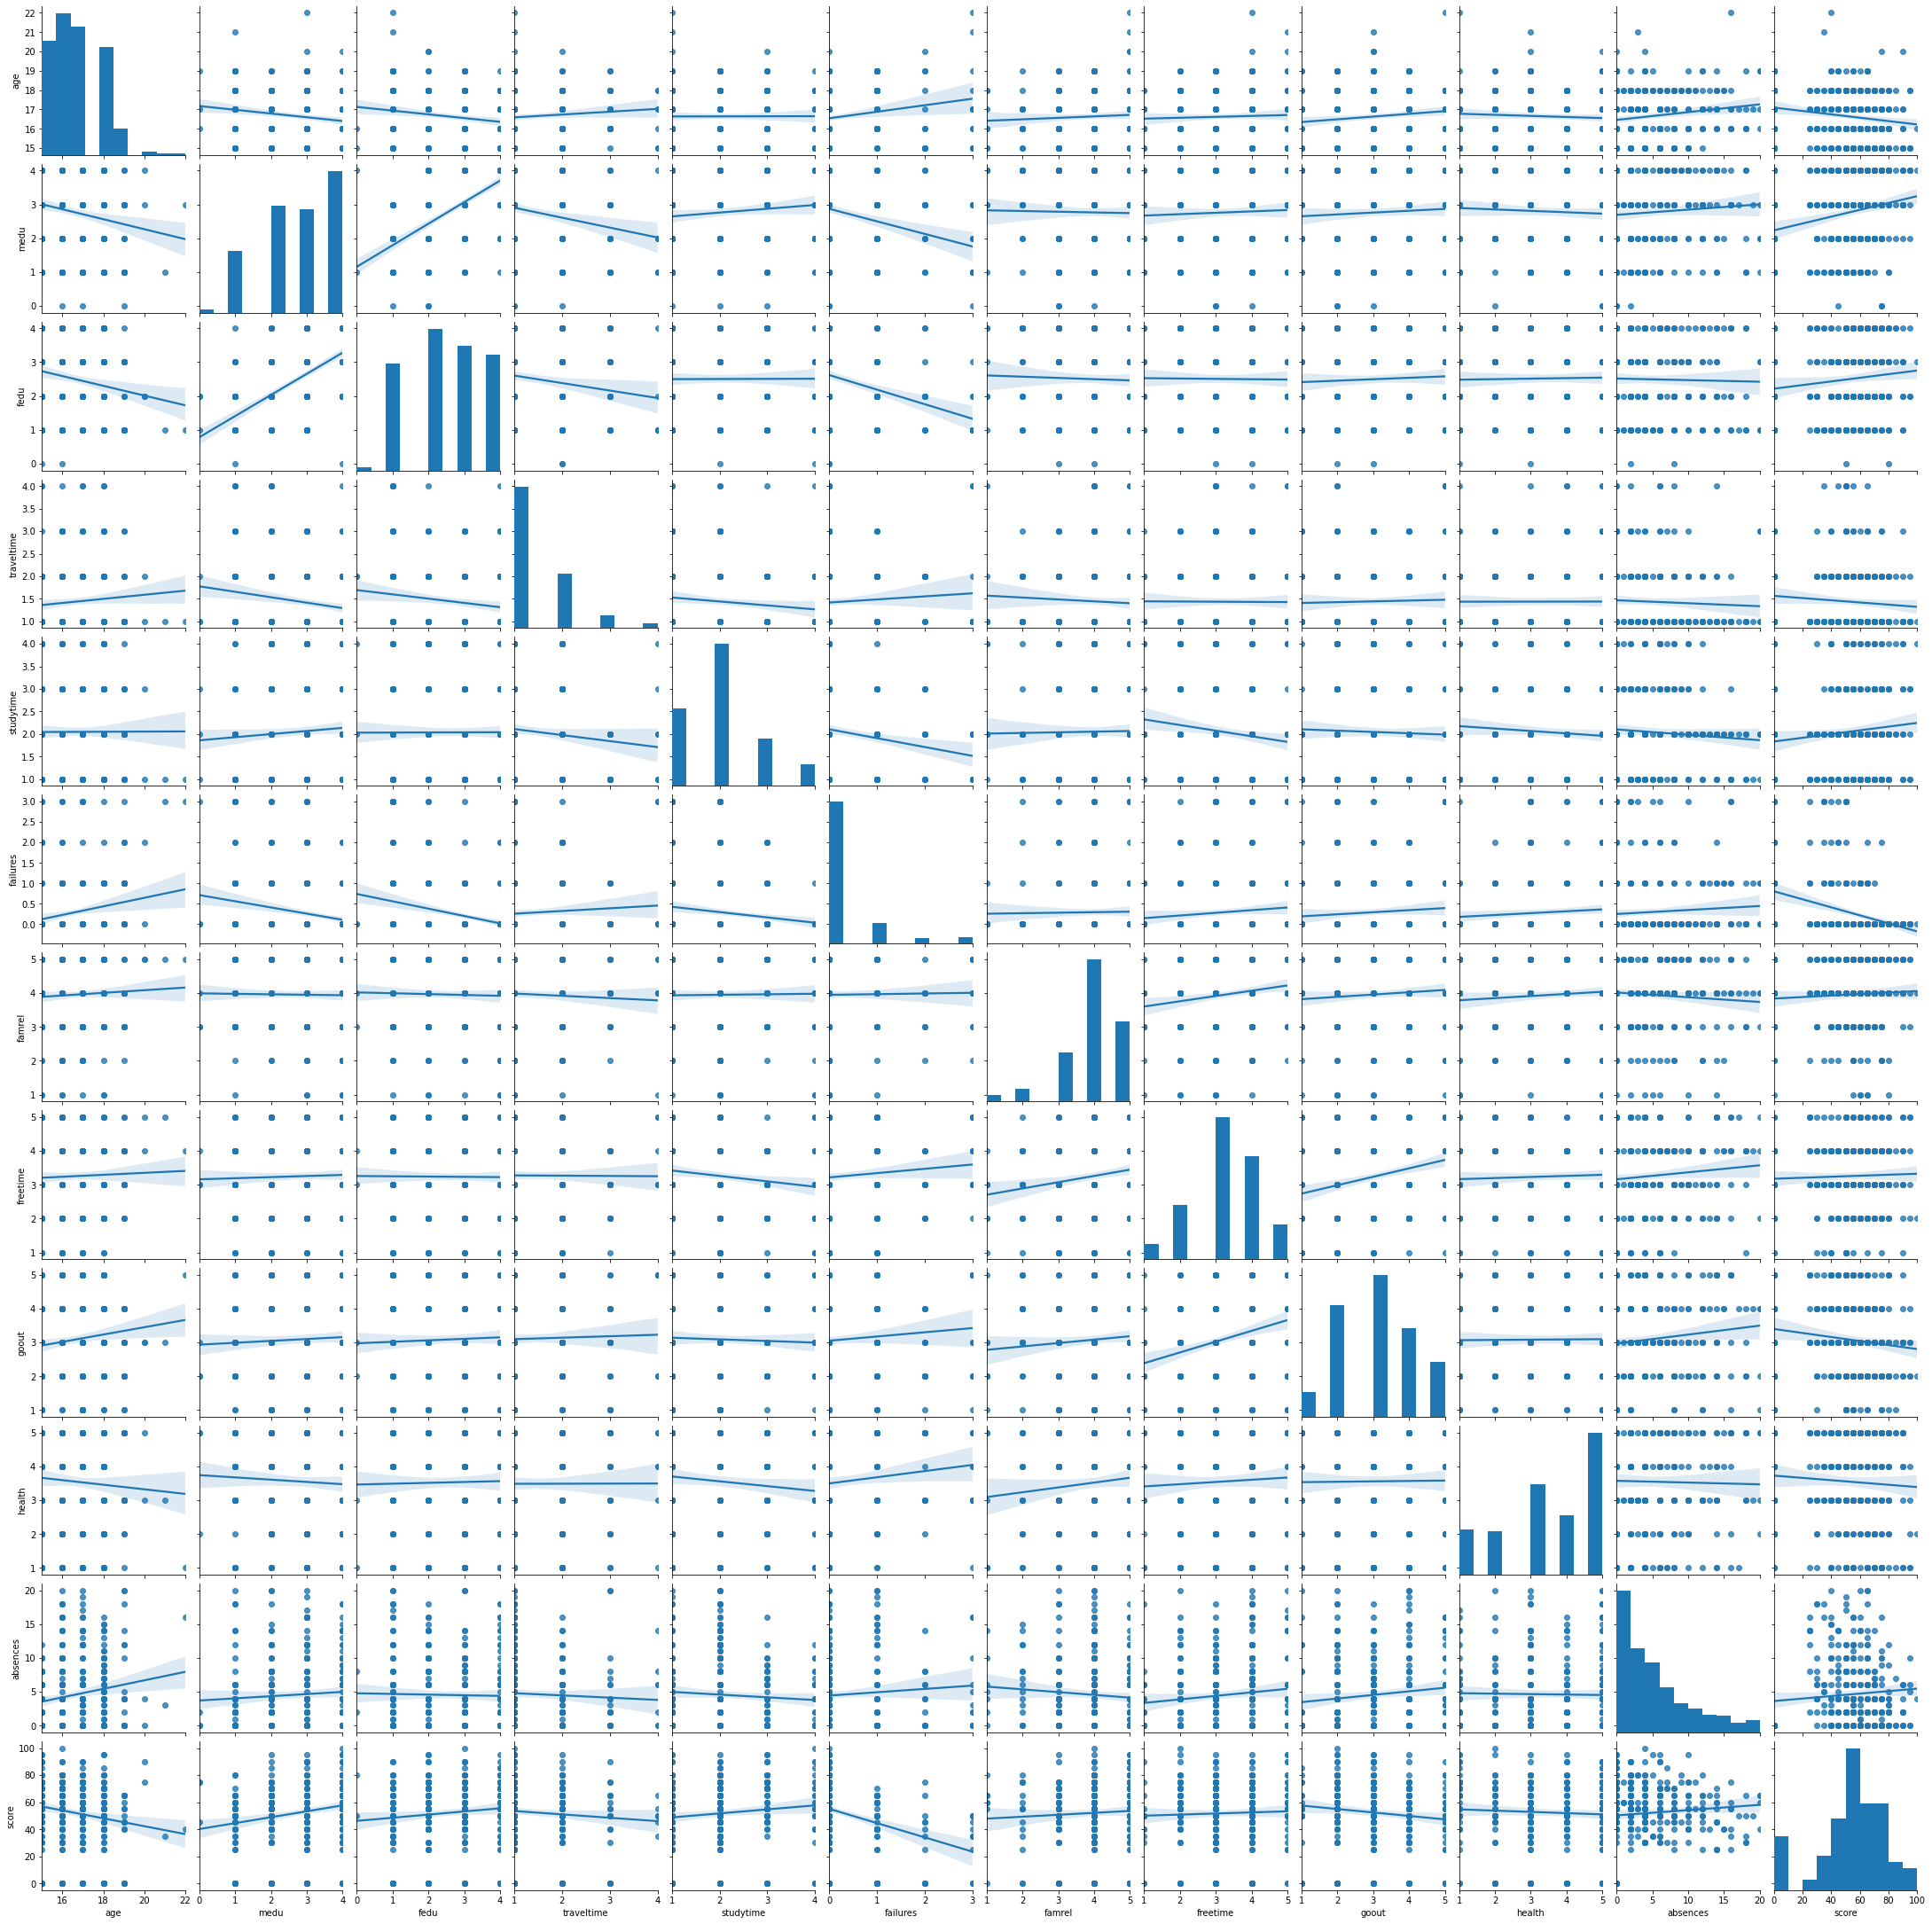

In [116]:
sns.pairplot(stud, kind = 'reg')

In [117]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.168805,-0.166681,0.081581,0.002755,0.187773,0.054576,0.036956,0.123274,-0.061618,0.158915,-0.159303
medu,-0.168805,1.000000,0.630589,-0.188411,0.088130,-0.236954,-0.016936,0.036623,0.054977,-0.052923,0.070282,0.210282
fedu,-0.166681,0.630589,1.000000,-0.144825,0.003167,-0.278284,-0.030494,-0.009167,0.043267,0.019584,-0.021412,0.111636
traveltime,0.081581,-0.188411,-0.144825,1.000000,-0.108298,0.067058,-0.053151,-0.005921,0.027669,0.001530,-0.046846,-0.077995
studytime,0.002755,0.088130,0.003167,-0.108298,1.000000,-0.159958,0.014993,-0.141286,-0.037274,-0.087502,-0.069229,0.110724
failures,0.187773,-0.236954,-0.278284,0.067058,-0.159958,1.000000,0.015870,0.091042,0.079348,0.091444,0.069225,-0.321903
famrel,0.054576,-0.016936,-0.030494,-0.053151,0.014993,0.015870,1.000000,0.169973,0.082824,0.094629,-0.075659,0.056259
freetime,0.036956,0.036623,-0.009167,-0.005921,-0.141286,0.091042,0.169973,1.000000,0.281734,0.045982,0.103852,0.034553
goout,0.123274,0.054977,0.043267,0.027669,-0.037274,0.079348,0.082824,0.281734,1.000000,0.009364,0.118877,-0.123170
health,-0.061618,-0.052923,0.019584,0.001530,-0.087502,0.091444,0.094629,0.045982,0.009364,1.000000,-0.018787,-0.056029


Судя по корреляционному анализу, можно предположить, что у более успешных учеников:
- родители имеют высшее образование, 
- уходит больше времени на учебу вне школы, 
- количество внеучебных неудач у нуля,
- не так много времени на общение с друзьями.

## Анализ номинативных переменных

In [118]:
# Функция построения boxplot относительно колонки score
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index)],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [119]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      359 non-null    object 
 1   sex         359 non-null    object 
 2   age         359 non-null    int64  
 3   address     345 non-null    object 
 4   famsize     337 non-null    object 
 5   pstatus     323 non-null    object 
 6   medu        356 non-null    float64
 7   fedu        336 non-null    float64
 8   mjob        343 non-null    object 
 9   fjob        325 non-null    object 
 10  reason      342 non-null    object 
 11  guardian    329 non-null    object 
 12  traveltime  331 non-null    float64
 13  studytime   354 non-null    float64
 14  failures    359 non-null    float64
 15  schoolsup   350 non-null    object 
 16  famsup      325 non-null    object 
 17  paid        322 non-null    object 
 18  activities  345 non-null    object 
 19  nursery     344 non-null    o

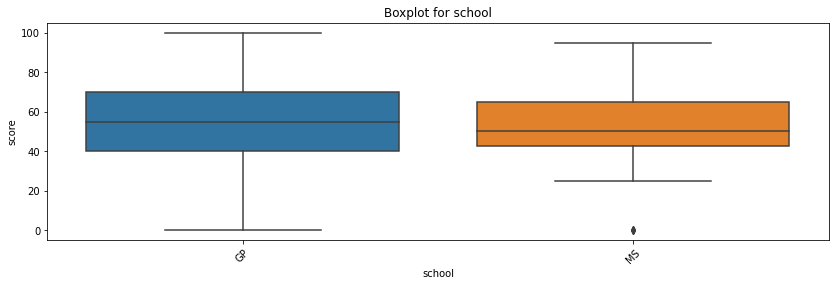

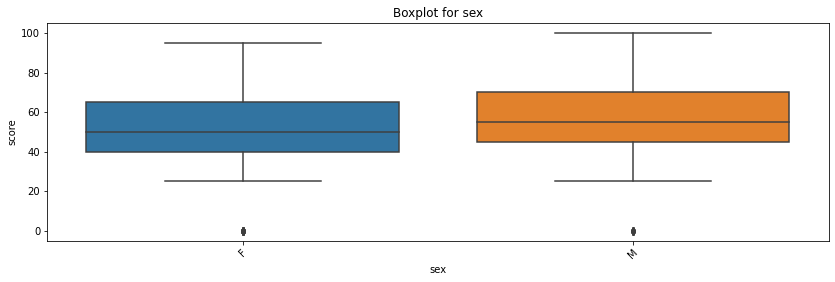

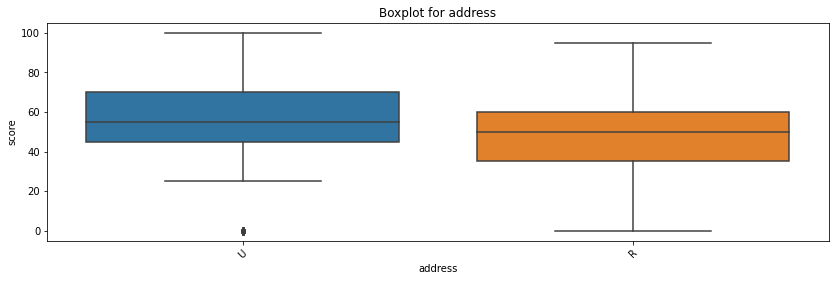

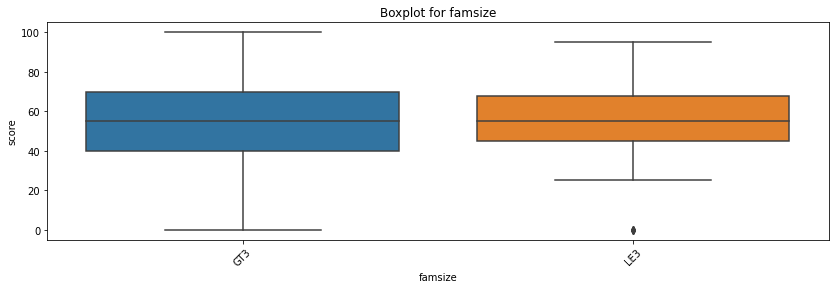

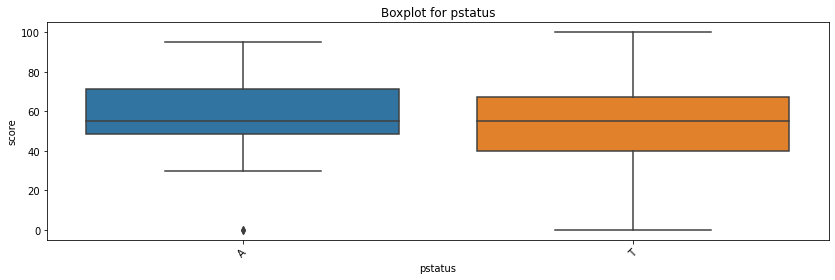

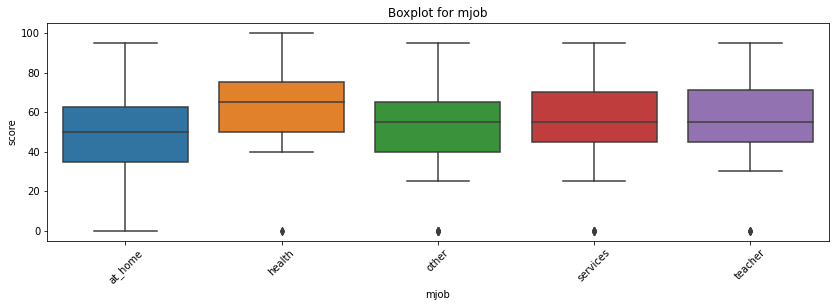

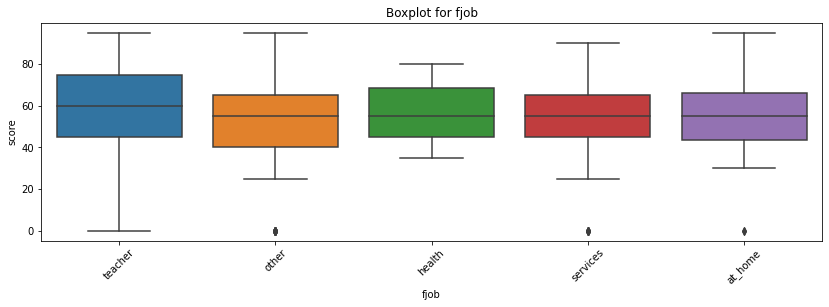

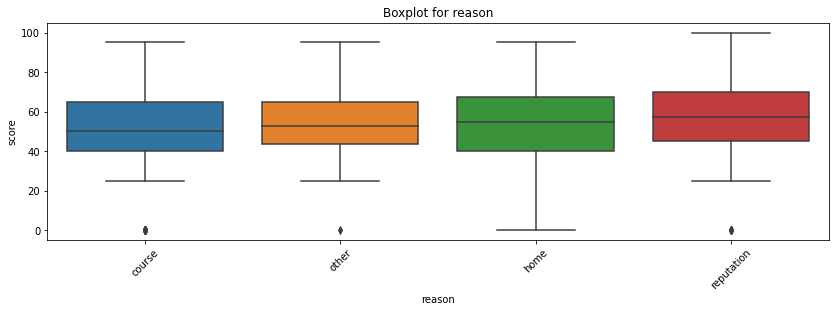

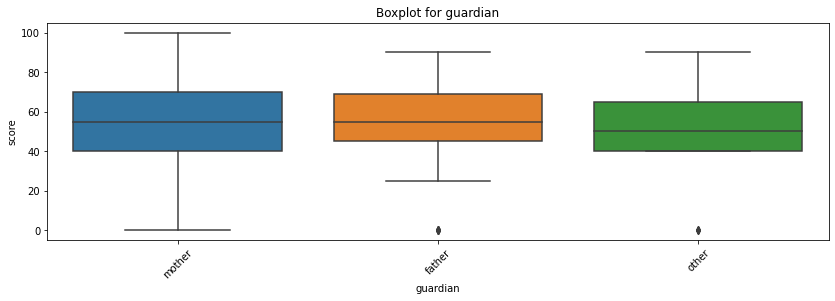

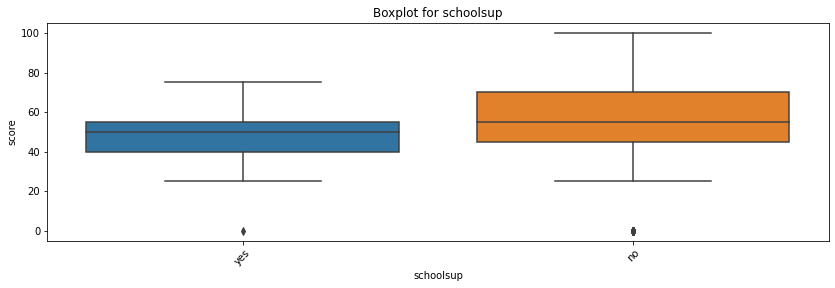

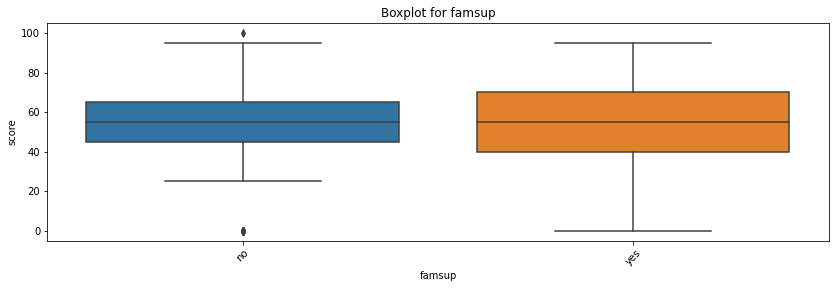

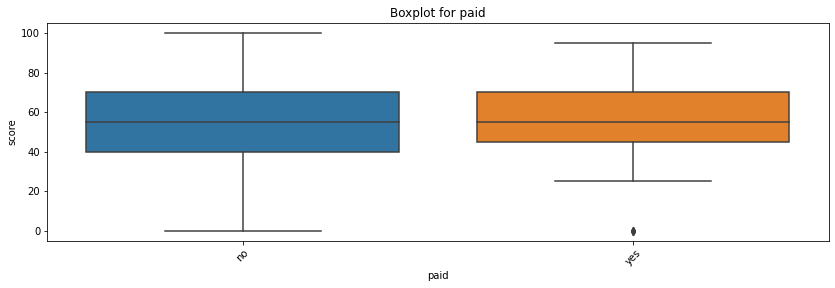

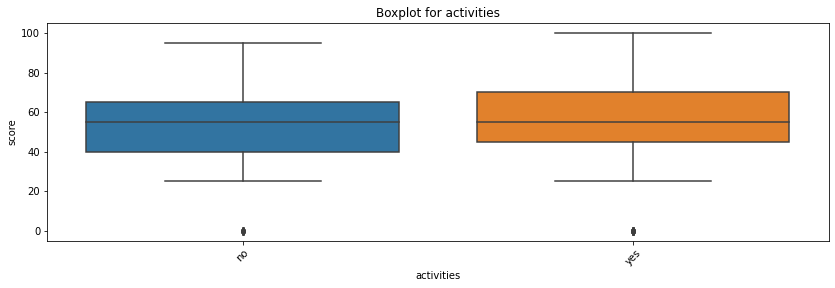

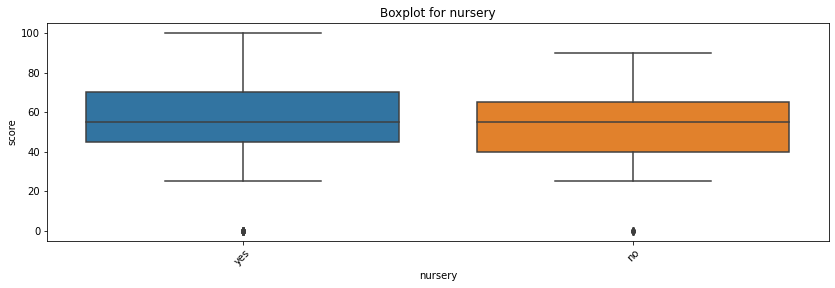

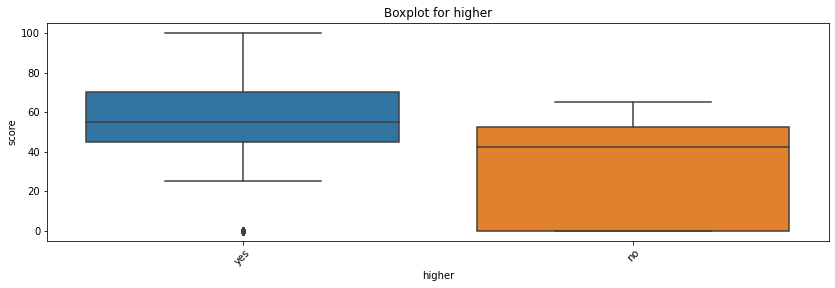

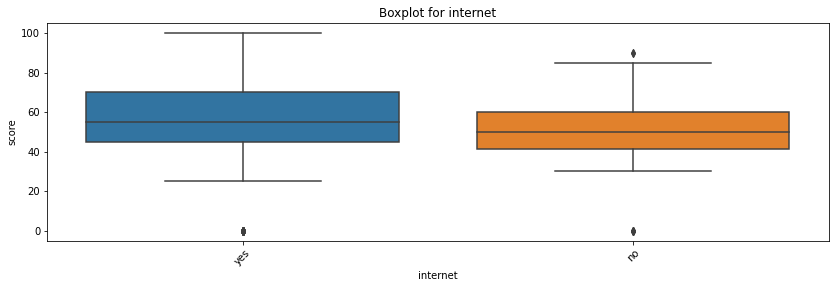

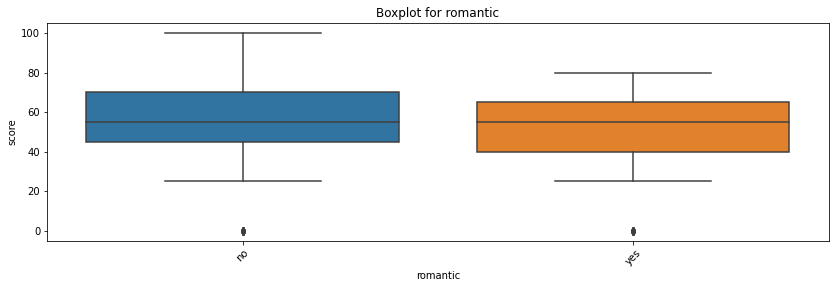

In [120]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Исходя из данных инфографиков, можно предположить, что более успешные ученики:
- Мальчики,
- Живут в городе,
- Родители живут вместе,
- Мама - врач,
- Папа - учитель,
- Хотят иметь высшее образование.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по различным параметрам неразличимы:

In [121]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [122]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Таким образом, из числовых оставляем: 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score'

Из строковых: 'sex', 'address', 'mjob', 'paid', 'higher', 'romantic'

In [123]:
stud_for_model = stud[['medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score', 'sex', 'address', 'mjob', 'paid', 'higher', 'romantic']]
stud_for_model.head()

,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score,sex,address,mjob,paid,higher,romantic
0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0,F,U,at_home,no,yes,no
1,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0,F,U,at_home,no,yes,no
2,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0,F,U,at_home,None,yes,None
3,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0,F,U,health,yes,yes,yes
4,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0,F,U,other,yes,yes,no


## Выводы

В результате EDA для анализа влияния условий жизни учащихся на успеваемость по математике были получены следующие выводы:

Во многих столбцах присутствуют пустые значения, порой до 11%.

Местами имеются выбросы (absences) и невалидные значения (famrel, fedu). В колонке failures, None были заменены на 0, согласно условию задачи: (n, если 1<=n<=3, иначе 0).

В строковых колонках попадается тип float у NaN, в связи с чем пришлось заменить на NoneType.

Для продолжения анализа, предполагается использование следующих данных:
medu, fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences, score, sex, address, mjob, paid, higher, romantic